### import libraries

In [1]:
import numpy as np
import pandas as pd
import hypertools as hyp
import matplotlib.pyplot as plt

%matplotlib inline

### read in data

In [2]:
menu = pd.read_csv('menu.csv', index_col=['Category','Item']).sort_index()
menu.head()

Serving Size  Calories  \
Category    Item                                               
Beef & Pork Bacon Clubhouse Burger  9.5 oz (270 g)       720   
            Bacon McDouble          5.7 oz (161 g)       440   
            Big Mac                 7.4 oz (211 g)       530   
            Cheeseburger              4 oz (113 g)       290   
            Daily Double            6.7 oz (190 g)       430   

                                    Calories from Fat  Total Fat  \
Category    Item                                                   
Beef & Pork Bacon Clubhouse Burger                360       40.0   
            Bacon McDouble                        200       22.0   
            Big Mac                               240       27.0   
            Cheeseburger                          100       11.0   
            Daily Double                          200       22.0   

                                    Total Fat (% Daily Value)  Saturated Fat  \
Category    Item                                                               
Beef & Pork Bacon Clubhouse Burger                         62           15.0   
            Bacon McDouble                                 34           10.0   
            Big Mac                                        42           10.0   
            Cheeseburger                                   18            5.0   
            Daily Double                                   35            9.0   

                                    Saturated Fat (% Daily Value)  Trans Fat  \
Category    Item                                                               
Beef & Pork Bacon Clubhouse Burger                             75        1.5   
            Bacon McDouble                                     49        1.0   
            Big Mac                                            48        1.0   
            Cheeseburger                                       27        0.5   
            Daily Double                                       44        1.0   

                                    Cholesterol  Cholesterol (% Daily Value)  \
Category    Item                                                               
Beef & Pork Bacon Clubhouse Burger          115                           38   
            Bacon McDouble                   90                           30   
            Big Mac                          85                           28   
            Cheeseburger                     45                           15   
            Daily Double                     80                           27   

                                            ...           Carbohydrates  \
Category    Item                            ...                           
Beef & Pork Bacon Clubhouse Burger          ...                      51   
            Bacon McDouble                  ...                      35   
            Big Mac                         ...                      47   
            Cheeseburger                    ...                      33   
            Daily Double                    ...                      34   

                                    Carbohydrates (% Daily Value)  \
Category    Item                                                    
Beef & Pork Bacon Clubhouse Burger                             17   
            Bacon McDouble                                     12   
            Big Mac                                            16   
            Cheeseburger                                       11   
            Daily Double                                       11   

                                    Dietary Fiber  \
Category    Item                                    
Beef & Pork Bacon Clubhouse Burger              4   
            Bacon McDouble                      2   
            Big Mac                             3   
            Cheeseburger                        2   
            Daily Double                        2   

                                    Dietary Fib

### remove units from serving size column, covert type

In [3]:
menu['Serving Size'] = menu['Serving Size'].apply(lambda x: float(x.split()[0]))
menu.rename({'Serving Size' : 'Serving Size (oz/fl oz)'}, axis='columns', inplace=True)
if not pd.isnull(menu.values).any():
    print('there are no NaN values in this dataset')

there are no NaN values in this dataset


## plot average calories per serving for each menu category (error bars = standard deviation)

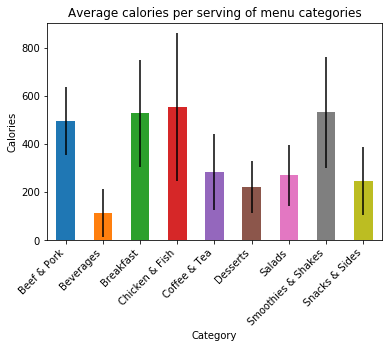

In [4]:
cat_group = menu.Calories.groupby('Category')
ax = cat_group.mean().plot(kind='bar', yerr=cat_group.std())
ax.set_xticklabels(cat_group.mean().index, rotation=45, ha='right')
ax.set_ylabel('Calories')
ax.set_title('Average calories per serving of menu categories')
plt.show()

### extract some values to an array

In [5]:
menu_values = menu[[col for col in menu.columns if '(' not in col]].values

### Visualize clustering of nutrition info

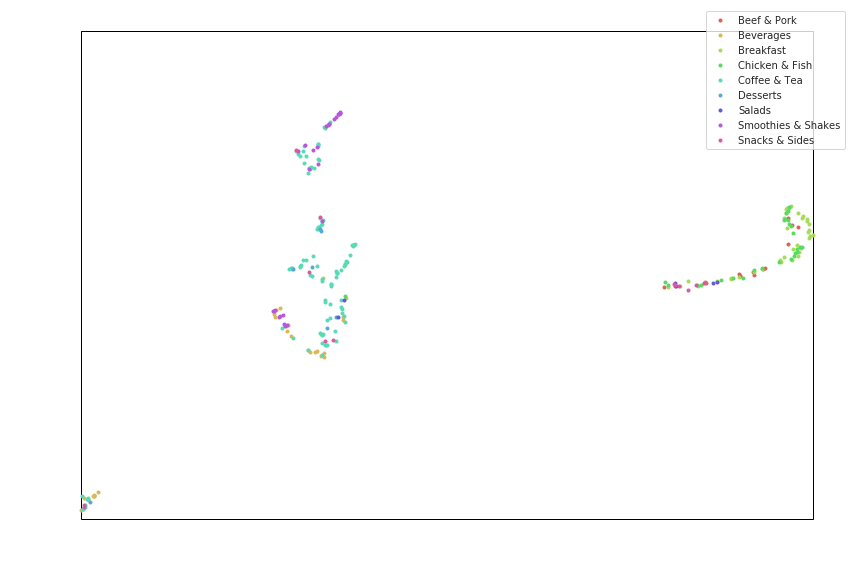

In [6]:
np.random.seed(0)    # so the plot will be the same for others who run this notebook
cats = menu.index.levels[0]
hue = [[i]*len(menu.loc[i]) for i in cats]
legend = [list(set(i))[0] for i in hue]
hyp.plot(menu_values, reduce='UMAP', ndims=2, fmt='.', hue=hue, legend=legend, size=[12,8])
plt.show()

I found a simple online dataset comprising nutrition info for each item on the McDonald's menu. The dataset came with labels for each item that corresponded to its category on the menu, so I thought would be interesting to compare the "healthiness" of the different categories as McDonald's defines them.  I loaded the data into a multi-index dataframe, filtered non-numbers from the one column that contained units (serving size), then quickly checked to make sure there were no NaNs present.  

First, I wanted to simply compare the calorie counts between the categories, so I used the Pandas `groupby()` method to create a `groupby` object from the "Calories" column.  I made a simple barplot of the categories' averages with error bars showing the standard deviation of each (which is easily accessible with the `groupby` object's `std` method).  The standard deviations were larger than I expected, so I wanted to get more information about how varied the "healthiness" of items within each category was. 

I extracted the nutrition information to a numpy array, but left out the percent daily value columns, as I felt those were redundant with the raw values. I also left out the serving size, since I was not interested in that metric and because the units varied slightly between solid food and drinks. I then used `hypertools` and the `UMAP` algorithm to reduce the data to two dimensions and plot it.  

In the plot, each dot is a menu item, colored by its category.  There appear to be 3-4 main clusters of menu items, and certain categories cluster together more than others.  Without further analysis, it is difficult to definitively say what combination of attributes constitute these clusters, but a quick re-examination of the dataset suggests that the top-right cluster is composed of high-protein/high-fat/meat-based foods, as Beef & Pork, Chicken & Fish, and Breakfast category items are highly concentrated there.  In the middle cluster seem to be high-sugar items, including Deserts, Smoothies & Shakes, and some Coffee & Tea items.  The bottom left appears to comprise healthier options, including a few Beverages, some snacks, and maybe some of the less elaborate coffee choices. Notice which cluster is the smallest...